# Report 04 Table 1.1

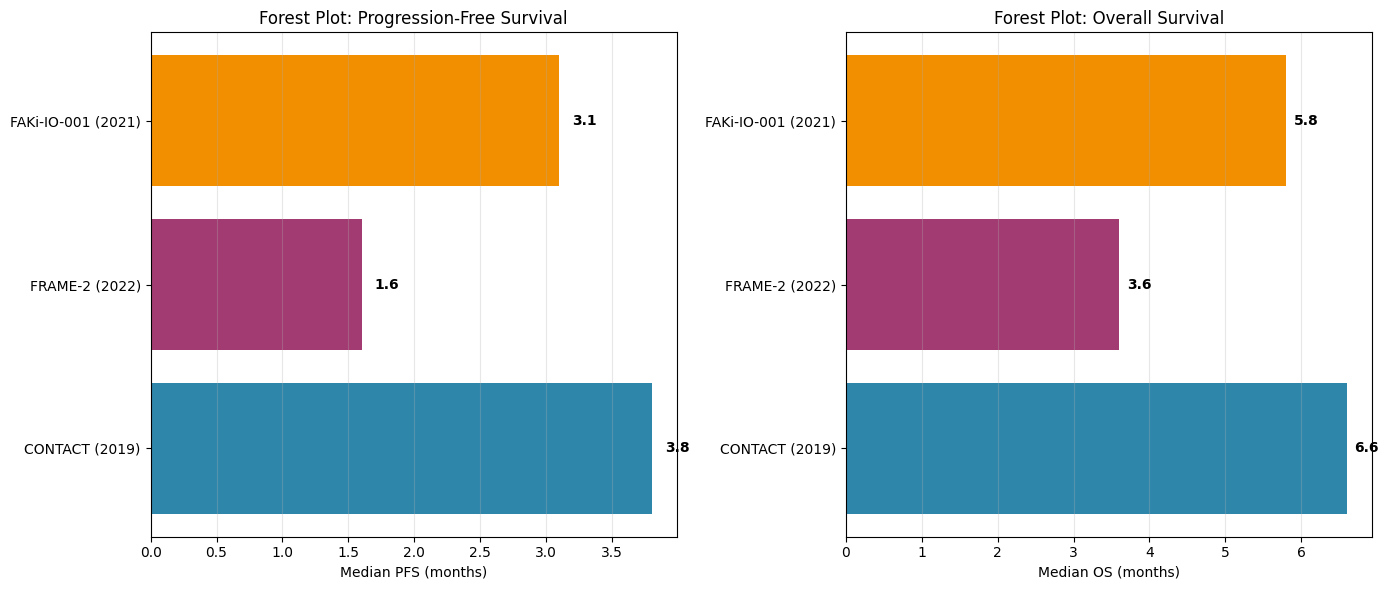

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data
data = {
    'Trial': ['CONTACT (2019)', 'FRAME-2 (2022)', 'FAKi-IO-001 (2021)'],
    'PFS': [3.8, 1.6, 3.1],
    'OS': [6.6, 3.6, 5.8],
    'N': [68, 16, 30]
}

df = pd.DataFrame(data)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# PFS Forest Plot
y_pos = np.arange(len(df))
ax1.barh(y_pos, df['PFS'], color=['#2E86AB', '#A23B72', '#F18F01'])
ax1.set_yticks(y_pos)
ax1.set_yticklabels(df['Trial'])
ax1.set_xlabel('Median PFS (months)')
ax1.set_title('Forest Plot: Progression-Free Survival')
ax1.grid(axis='x', alpha=0.3)

# Add values on bars
for i, v in enumerate(df['PFS']):
    ax1.text(v + 0.1, i, f'{v}', va='center', fontweight='bold')

# OS Forest Plot
ax2.barh(y_pos, df['OS'], color=['#2E86AB', '#A23B72', '#F18F01'])
ax2.set_yticks(y_pos)
ax2.set_yticklabels(df['Trial'])
ax2.set_xlabel('Median OS (months)')
ax2.set_title('Forest Plot: Overall Survival')
ax2.grid(axis='x', alpha=0.3)

# Add values on bars
for i, v in enumerate(df['OS']):
    ax2.text(v + 0.1, i, f'{v}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

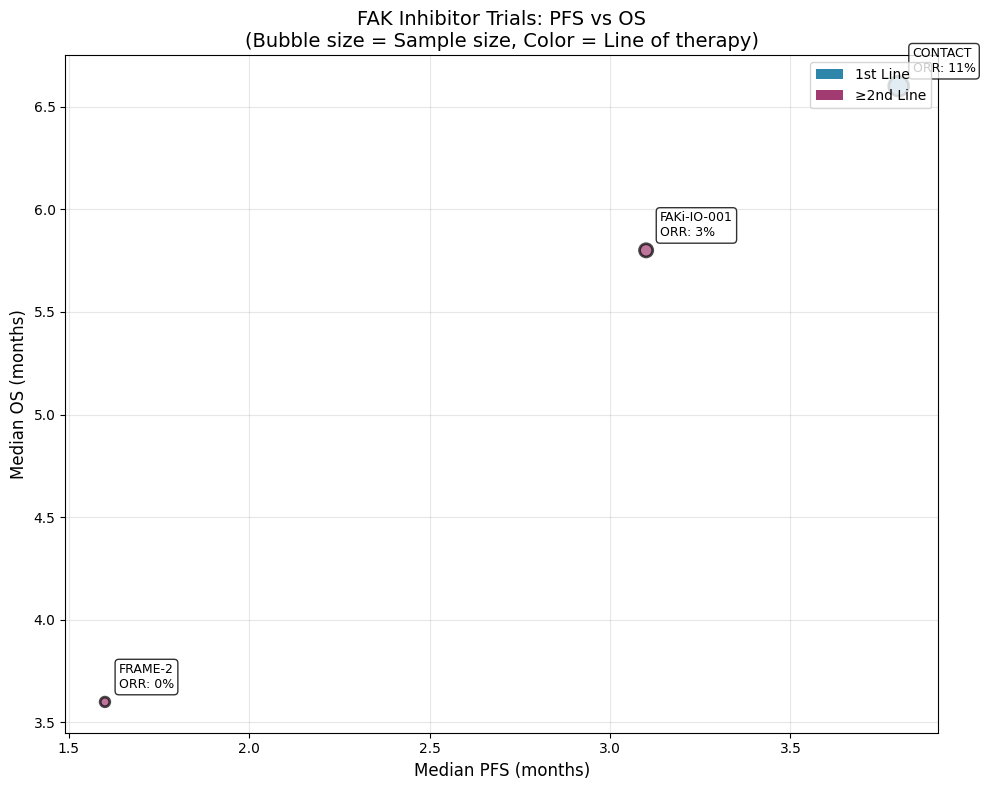

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    'Trial': ['CONTACT', 'FRAME-2', 'FAKi-IO-001'],
    'PFS': [3.8, 1.6, 3.1],
    'OS': [6.6, 3.6, 5.8],
    'ORR': [11, 0, 3],
    'N': [68, 16, 30],
    'FAK_Inhibitor': ['Defactinib', 'GSK2256098', 'Defactinib'],
    'Line_of_Tx': ['1L', '≥2L', '≥2L']
}

df = pd.DataFrame(data)

# Create color mapping
color_map = {'1L': '#2E86AB', '≥2L': '#A23B72'}
colors = [color_map[line] for line in df['Line_of_Tx']]

plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['PFS'], df['OS'],
                     s=df['N']*3,  # Size based on sample size
                     c=colors,
                     alpha=0.7,
                     edgecolors='black',
                     linewidth=2)

# Add labels for each point
for i, trial in enumerate(df['Trial']):
    plt.annotate(f"{trial}\nORR: {df['ORR'][i]}%",
                (df['PFS'][i], df['OS'][i]),
                xytext=(10, 10), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8),
                fontsize=9)

plt.xlabel('Median PFS (months)', fontsize=12)
plt.ylabel('Median OS (months)', fontsize=12)
plt.title('FAK Inhibitor Trials: PFS vs OS\n(Bubble size = Sample size, Color = Line of therapy)',
          fontsize=14)

# Create legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#2E86AB', label='1st Line'),
                   Patch(facecolor='#A23B72', label='≥2nd Line')]
plt.legend(handles=legend_elements, loc='upper right')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

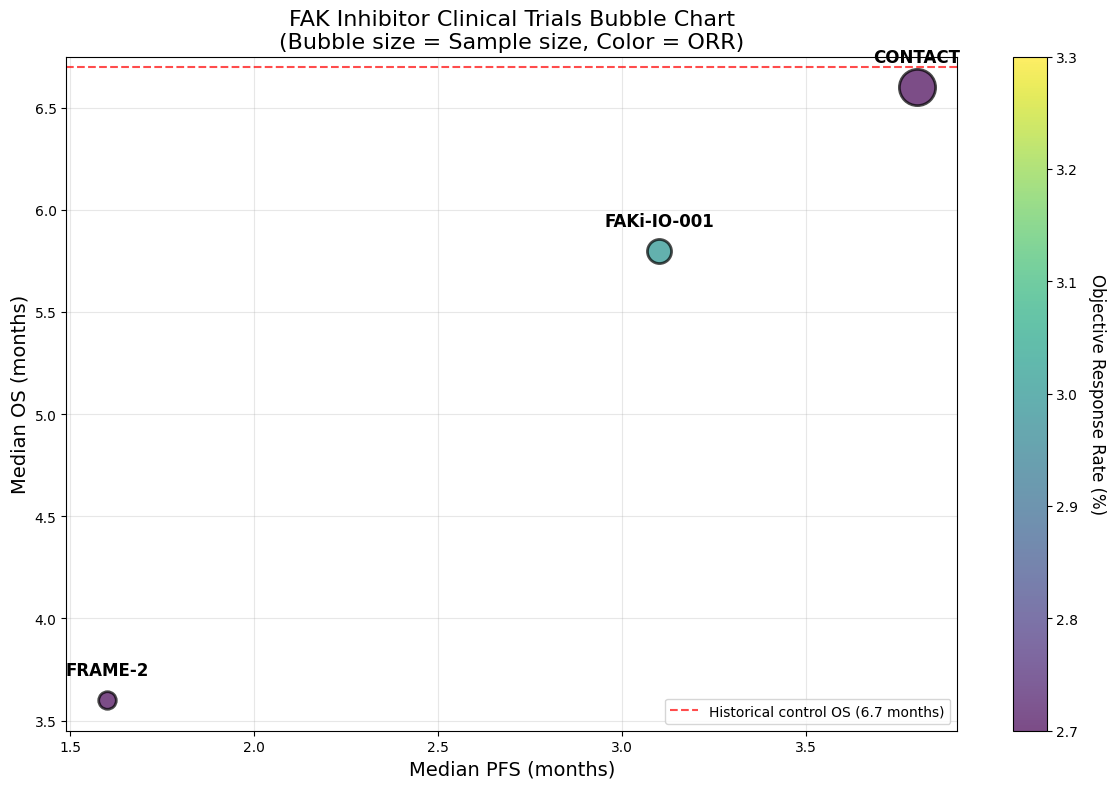

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data
data = {
    'Trial': ['CONTACT', 'FRAME-2', 'FAKi-IO-001'],
    'PFS': [3.8, 1.6, 3.1],
    'OS': [6.6, 3.6, 5.8],
    'ORR': [11, 0, 3],
    'N': [68, 16, 30]
}

df = pd.DataFrame(data)

plt.figure(figsize=(12, 8))

# Create bubble chart
for i, row in df.iterrows():
    plt.scatter(row['PFS'], row['OS'],
               s=row['N']*10,  # Bubble size based on sample size
               c=row['ORR'],
               cmap='viridis',
               alpha=0.7,
               edgecolors='black',
               linewidth=2)

    # Add trial labels
    plt.annotate(row['Trial'],
                (row['PFS'], row['OS']),
                xytext=(0, 15), textcoords='offset points',
                ha='center', va='bottom',
                fontsize=12, fontweight='bold')

# Add colorbar for ORR
cbar = plt.colorbar()
cbar.set_label('Objective Response Rate (%)', rotation=270, labelpad=20, fontsize=12)

plt.xlabel('Median PFS (months)', fontsize=14)
plt.ylabel('Median OS (months)', fontsize=14)
plt.title('FAK Inhibitor Clinical Trials Bubble Chart\n(Bubble size = Sample size, Color = ORR)',
          fontsize=16)

# Add reference lines
plt.axhline(y=6.7, color='red', linestyle='--', alpha=0.7,
           label='Historical control OS (6.7 months)')
plt.legend()

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

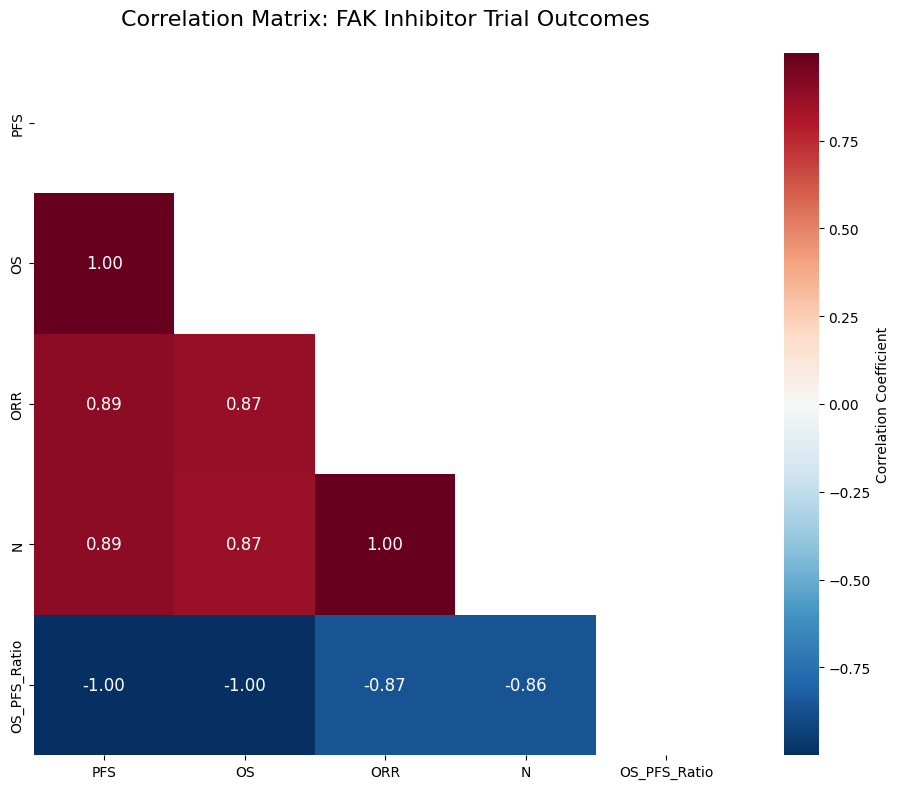

Key Correlations:
PFS vs OS: 1.00
PFS vs ORR: 0.89
PFS vs N: 0.89
PFS vs OS_PFS_Ratio: -1.00
OS vs ORR: 0.87
OS vs N: 0.87
OS vs OS_PFS_Ratio: -1.00
ORR vs N: 1.00
ORR vs OS_PFS_Ratio: -0.87
N vs OS_PFS_Ratio: -0.86


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Data with additional calculated metrics
data = {
    'Trial': ['CONTACT', 'FRAME-2', 'FAKi-IO-001'],
    'PFS': [3.8, 1.6, 3.1],
    'OS': [6.6, 3.6, 5.8],
    'ORR': [11, 0, 3],
    'N': [68, 16, 30],
    'OS_PFS_Ratio': [6.6/3.8, 3.6/1.6, 5.8/3.1]
}

df = pd.DataFrame(data)

# Select numerical columns for correlation
numerical_cols = ['PFS', 'OS', 'ORR', 'N', 'OS_PFS_Ratio']
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

heatmap = sns.heatmap(corr_matrix,
                      mask=mask,
                      annot=True,
                      cmap='RdBu_r',
                      center=0,
                      square=True,
                      fmt='.2f',
                      cbar_kws={'label': 'Correlation Coefficient'},
                      annot_kws={'size': 12})

plt.title('Correlation Matrix: FAK Inhibitor Trial Outcomes', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Print correlation insights
print("Key Correlations:")
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        print(f"{corr_matrix.columns[i]} vs {corr_matrix.columns[j]}: {corr_val:.2f}")

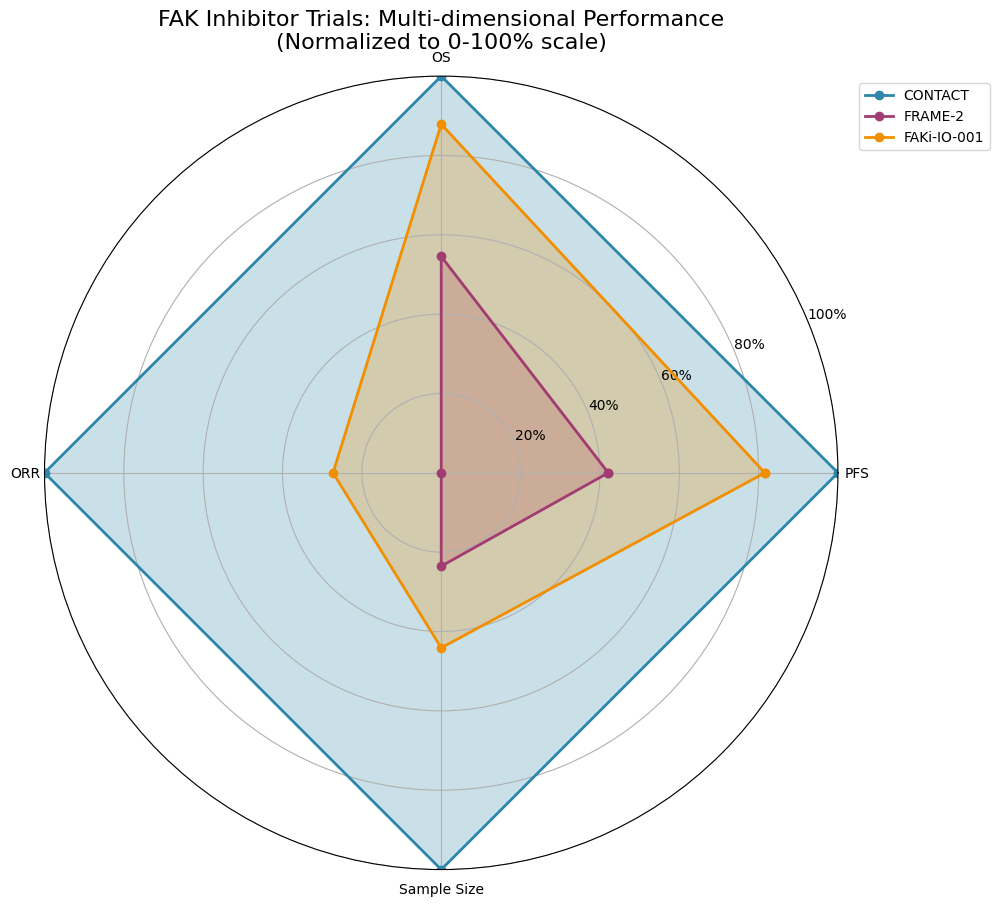

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data
data = {
    'Trial': ['CONTACT', 'FRAME-2', 'FAKi-IO-001'],
    'PFS': [3.8, 1.6, 3.1],
    'OS': [6.6, 3.6, 5.8],
    'ORR': [11, 0, 3],
    'N': [68, 16, 30]
}

df = pd.DataFrame(data)

# Normalize data for radar chart (0-100 scale)
normalized_data = df.copy()
normalized_data['PFS_norm'] = (df['PFS'] / df['PFS'].max()) * 100
normalized_data['OS_norm'] = (df['OS'] / df['OS'].max()) * 100
normalized_data['ORR_norm'] = (df['ORR'] / max(df['ORR'].max(), 1)) * 100
normalized_data['N_norm'] = (df['N'] / df['N'].max()) * 100

# Set up radar chart
categories = ['PFS', 'OS', 'ORR', 'Sample Size']
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

# Number of variables
N = len(categories)

# Compute angle for each axis
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Complete the circle

# Colors for each trial
colors = ['#2E86AB', '#A23B72', '#F18F01']

# Plot each trial
for i, trial in enumerate(df['Trial']):
    values = [
        normalized_data.iloc[i]['PFS_norm'],
        normalized_data.iloc[i]['OS_norm'],
        normalized_data.iloc[i]['ORR_norm'],
        normalized_data.iloc[i]['N_norm']
    ]
    values += values[:1]  # Complete the circle

    ax.plot(angles, values, 'o-', linewidth=2, label=trial, color=colors[i])
    ax.fill(angles, values, alpha=0.25, color=colors[i])

# Add category labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Set y-axis limits
ax.set_ylim(0, 100)
ax.set_yticks([20, 40, 60, 80, 100])
ax.set_yticklabels(['20%', '40%', '60%', '80%', '100%'])

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
plt.title('FAK Inhibitor Trials: Multi-dimensional Performance\n(Normalized to 0-100% scale)',
          size=16, pad=20)
plt.tight_layout()
plt.show()

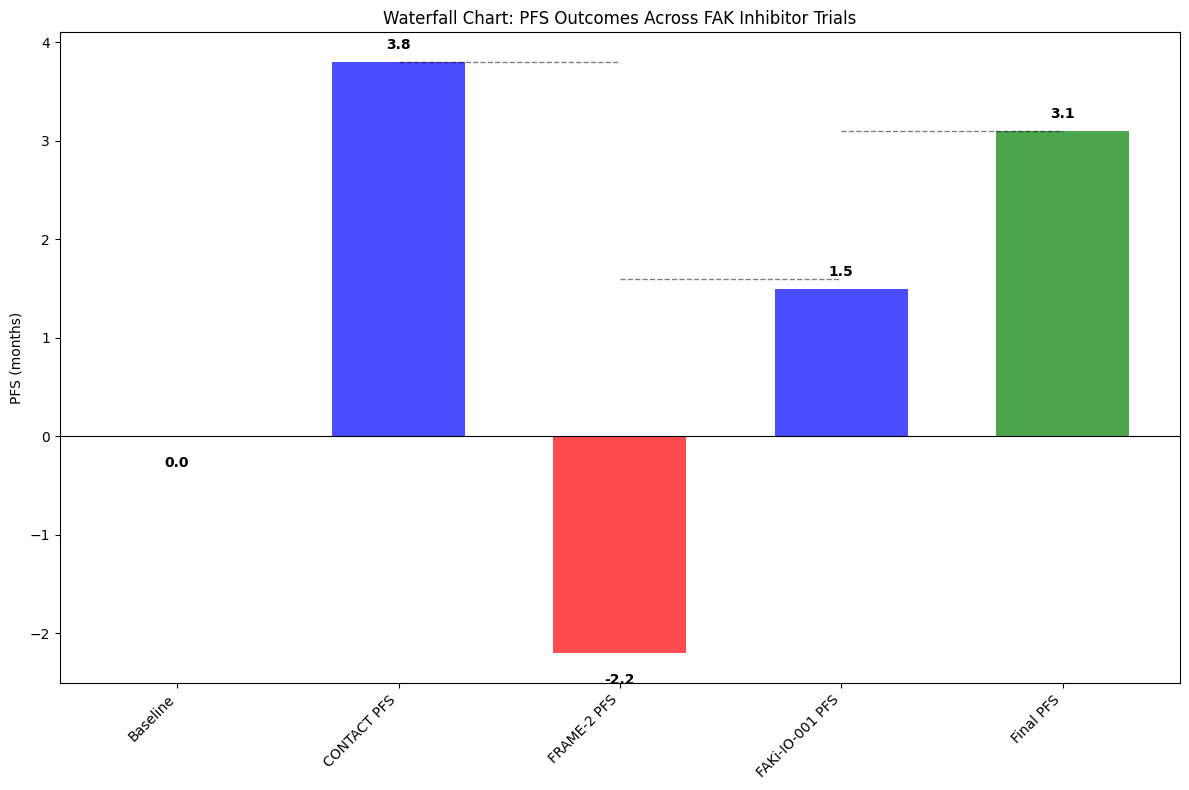

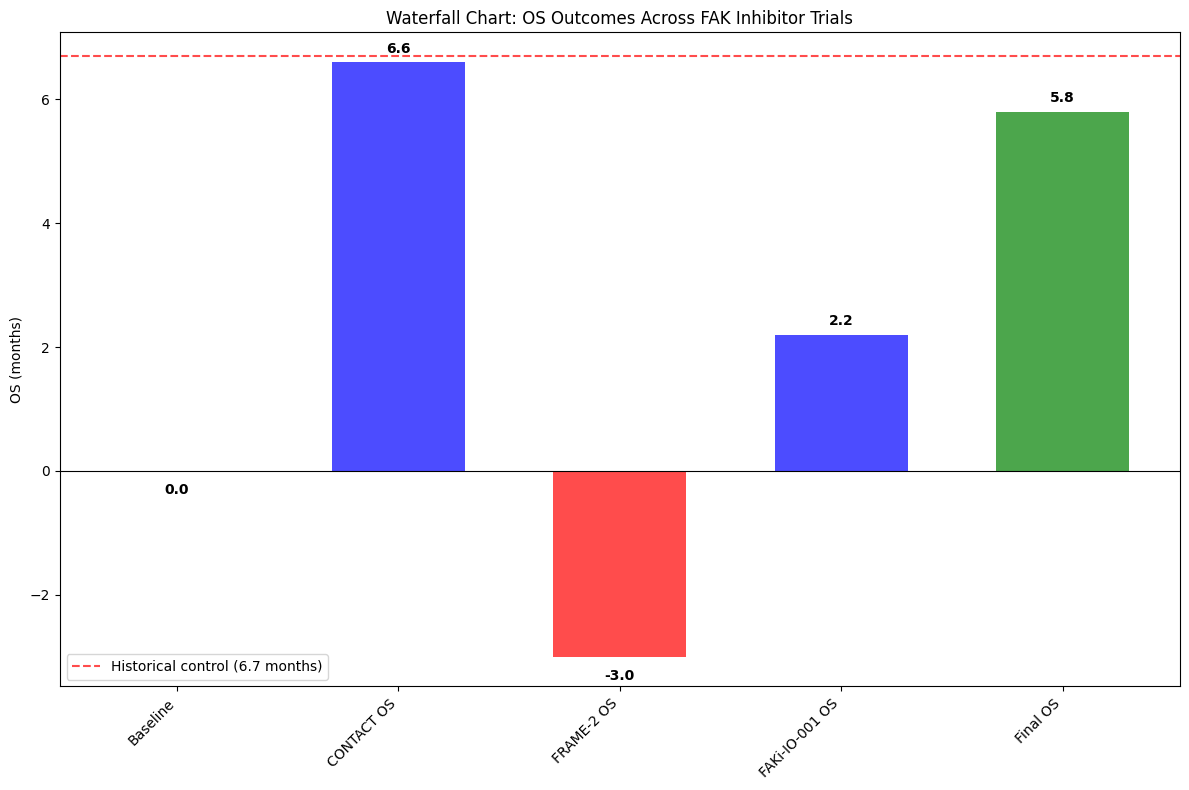

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data for waterfall showing progression of outcomes
data = {
    'Metric': ['Baseline', 'CONTACT PFS', 'FRAME-2 PFS', 'FAKi-IO-001 PFS', 'Final PFS'],
    'Value': [0, 3.8, -2.2, 1.5, 3.1],  # Changes from baseline
    'Cumulative': [0, 3.8, 1.6, 3.1, 3.1]
}

df = pd.DataFrame(data)

# Create waterfall chart
fig, ax = plt.subplots(figsize=(12, 8))

# Colors for positive and negative changes
colors = ['blue' if x >= 0 else 'red' for x in df['Value']]
colors[0] = 'gray'  # Baseline
colors[-1] = 'green'  # Final

# Create bars
bars = ax.bar(range(len(df)), df['Value'], color=colors, alpha=0.7, width=0.6)

# Add connecting lines showing cumulative effect
for i in range(len(df)-1):
    if i > 0:
        ax.plot([i, i+1], [df['Cumulative'][i], df['Cumulative'][i]],
                'k--', alpha=0.5, linewidth=1)

# Customize chart
ax.set_xticks(range(len(df)))
ax.set_xticklabels(df['Metric'], rotation=45, ha='right')
ax.set_ylabel('PFS (months)')
ax.set_title('Waterfall Chart: PFS Outcomes Across FAK Inhibitor Trials')

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, df['Value'])):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.1 if height > 0 else height - 0.2,
            f'{value:.1f}', ha='center', va='bottom' if height > 0 else 'top',
            fontweight='bold')

# Add horizontal line at zero
ax.axhline(y=0, color='black', linewidth=0.8)

plt.tight_layout()
plt.show()

# Additional waterfall for OS
fig, ax = plt.subplots(figsize=(12, 8))

os_data = {
    'Metric': ['Baseline', 'CONTACT OS', 'FRAME-2 OS', 'FAKi-IO-001 OS', 'Final OS'],
    'Value': [0, 6.6, -3.0, 2.2, 5.8],
    'Cumulative': [0, 6.6, 3.6, 5.8, 5.8]
}

os_df = pd.DataFrame(os_data)
colors = ['blue' if x >= 0 else 'red' for x in os_df['Value']]
colors[0] = 'gray'
colors[-1] = 'green'

bars = ax.bar(range(len(os_df)), os_df['Value'], color=colors, alpha=0.7, width=0.6)

ax.set_xticks(range(len(os_df)))
ax.set_xticklabels(os_df['Metric'], rotation=45, ha='right')
ax.set_ylabel('OS (months)')
ax.set_title('Waterfall Chart: OS Outcomes Across FAK Inhibitor Trials')

for i, (bar, value) in enumerate(zip(bars, os_df['Value'])):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.1 if height > 0 else height - 0.2,
            f'{value:.1f}', ha='center', va='bottom' if height > 0 else 'top',
            fontweight='bold')

ax.axhline(y=0, color='black', linewidth=0.8)
ax.axhline(y=6.7, color='red', linestyle='--', alpha=0.7,
           label='Historical control (6.7 months)')
ax.legend()

plt.tight_layout()
plt.show()

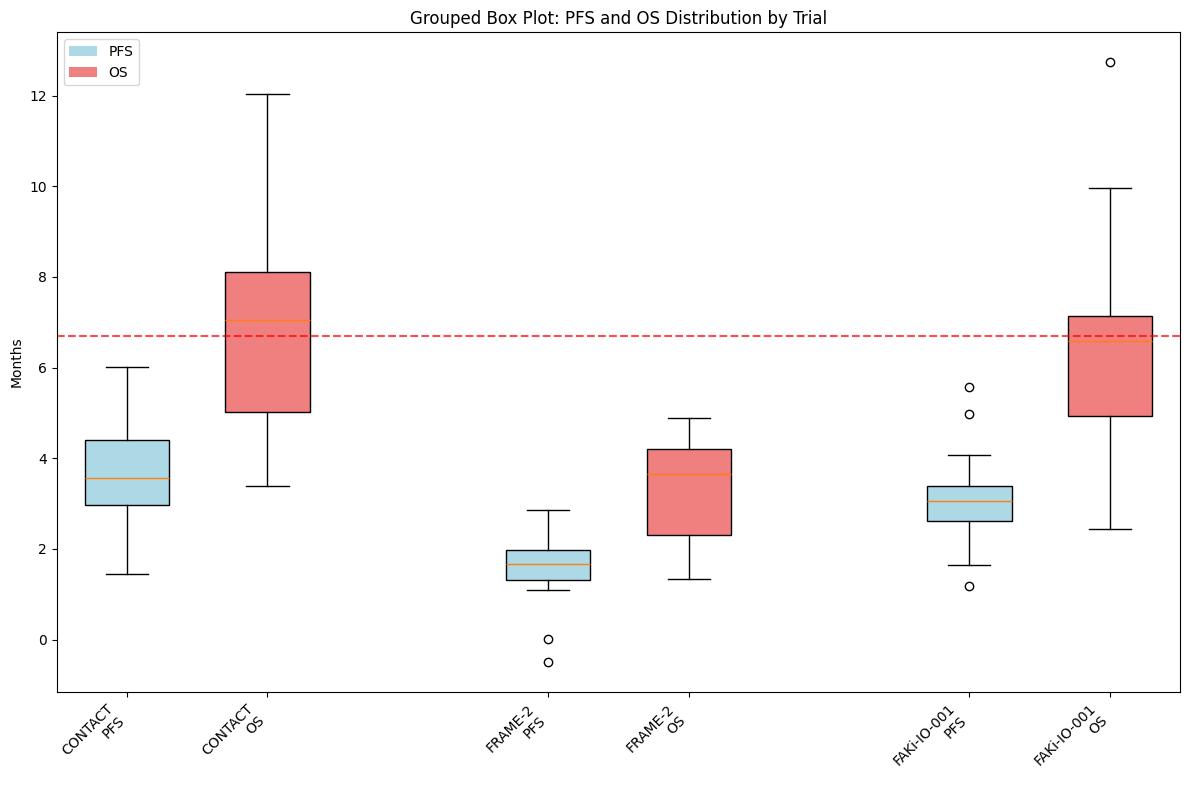

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create expanded dataset for box plot simulation
np.random.seed(42)

# Simulate individual patient data based on trial means
contact_pfs = np.random.normal(3.8, 1.2, 68)
frame2_pfs = np.random.normal(1.6, 0.8, 16)
fakio_pfs = np.random.normal(3.1, 1.0, 30)

contact_os = np.random.normal(6.6, 2.0, 68)
frame2_os = np.random.normal(3.6, 1.5, 16)
fakio_os = np.random.normal(5.8, 1.8, 30)

# Create DataFrame
box_data = {
    'Trial': (['CONTACT']*68 + ['FRAME-2']*16 + ['FAKi-IO-001']*30) * 2,
    'Outcome': ['PFS']*114 + ['OS']*114,
    'Value': np.concatenate([contact_pfs, frame2_pfs, fakio_pfs,
                            contact_os, frame2_os, fakio_os])
}

box_df = pd.DataFrame(box_data)

# Create grouped box plot
fig, ax = plt.subplots(figsize=(12, 8))

trials = ['CONTACT', 'FRAME-2', 'FAKi-IO-001']
outcomes = ['PFS', 'OS']
positions = []
labels = []

for i, trial in enumerate(trials):
    for j, outcome in enumerate(outcomes):
        data = box_df[(box_df['Trial'] == trial) & (box_df['Outcome'] == outcome)]['Value']
        pos = i * 3 + j + 1
        positions.append(pos)
        labels.append(f'{trial}\n{outcome}')

        bp = ax.boxplot(data, positions=[pos], widths=0.6,
                       patch_artist=True,
                       boxprops=dict(facecolor='lightblue' if outcome == 'PFS' else 'lightcoral'))

ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel('Months')
ax.set_title('Grouped Box Plot: PFS and OS Distribution by Trial')

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='lightblue', label='PFS'),
                   Patch(facecolor='lightcoral', label='OS')]
ax.legend(handles=legend_elements)

# Add reference line for historical control
ax.axhline(y=6.7, color='red', linestyle='--', alpha=0.7,
           label='Historical OS control')

plt.tight_layout()
plt.show()

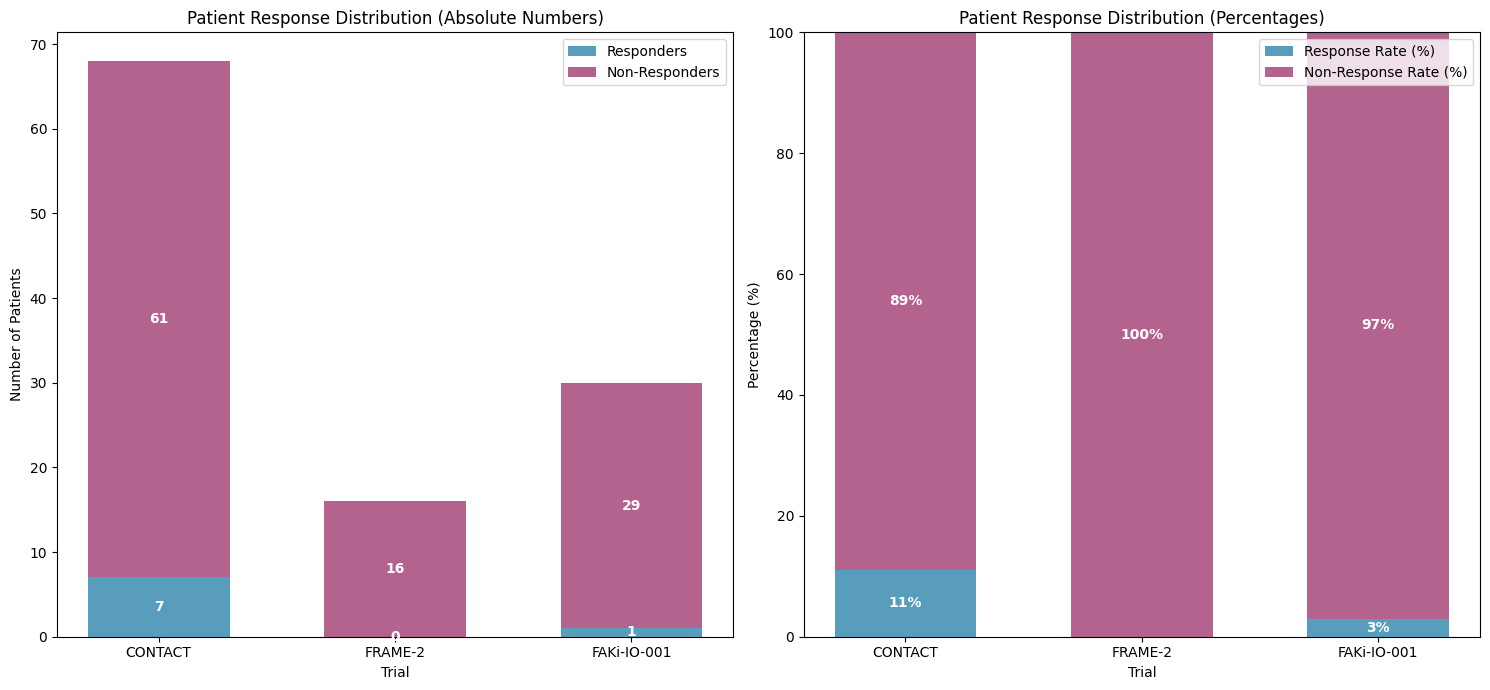

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data
data = {
    'Trial': ['CONTACT', 'FRAME-2', 'FAKi-IO-001'],
    'ORR': [11, 0, 3],
    'N': [68, 16, 30]
}

df = pd.DataFrame(data)

# Calculate response categories
df['Responders'] = (df['ORR'] * df['N'] / 100).round().astype(int)
df['Non_Responders'] = df['N'] - df['Responders']
df['Response_Rate'] = df['ORR']

# Create stacked bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Chart 1: Absolute numbers
x = np.arange(len(df))
width = 0.6

bars1 = ax1.bar(x, df['Responders'], width, label='Responders',
                color='#2E86AB', alpha=0.8)
bars2 = ax1.bar(x, df['Non_Responders'], width, bottom=df['Responders'],
                label='Non-Responders', color='#A23B72', alpha=0.8)

ax1.set_xlabel('Trial')
ax1.set_ylabel('Number of Patients')
ax1.set_title('Patient Response Distribution (Absolute Numbers)')
ax1.set_xticks(x)
ax1.set_xticklabels(df['Trial'])
ax1.legend()

# Add value labels
for i, (resp, total) in enumerate(zip(df['Responders'], df['N'])):
    ax1.text(i, resp/2, str(resp), ha='center', va='center', fontweight='bold', color='white')
    ax1.text(i, resp + (total-resp)/2, str(total-resp), ha='center', va='center',
             fontweight='bold', color='white')

# Chart 2: Percentage stacked
bars3 = ax2.bar(x, df['Response_Rate'], width, label='Response Rate (%)',
                color='#2E86AB', alpha=0.8)
bars4 = ax2.bar(x, 100-df['Response_Rate'], width, bottom=df['Response_Rate'],
                label='Non-Response Rate (%)', color='#A23B72', alpha=0.8)

ax2.set_xlabel('Trial')
ax2.set_ylabel('Percentage (%)')
ax2.set_title('Patient Response Distribution (Percentages)')
ax2.set_xticks(x)
ax2.set_xticklabels(df['Trial'])
ax2.legend()
ax2.set_ylim(0, 100)

# Add percentage labels
for i, rate in enumerate(df['Response_Rate']):
    if rate > 0:
        ax2.text(i, rate/2, f'{rate}%', ha='center', va='center',
                fontweight='bold', color='white')
    ax2.text(i, rate + (100-rate)/2, f'{100-rate:.0f}%', ha='center', va='center',
             fontweight='bold', color='white')

plt.tight_layout()
plt.show()

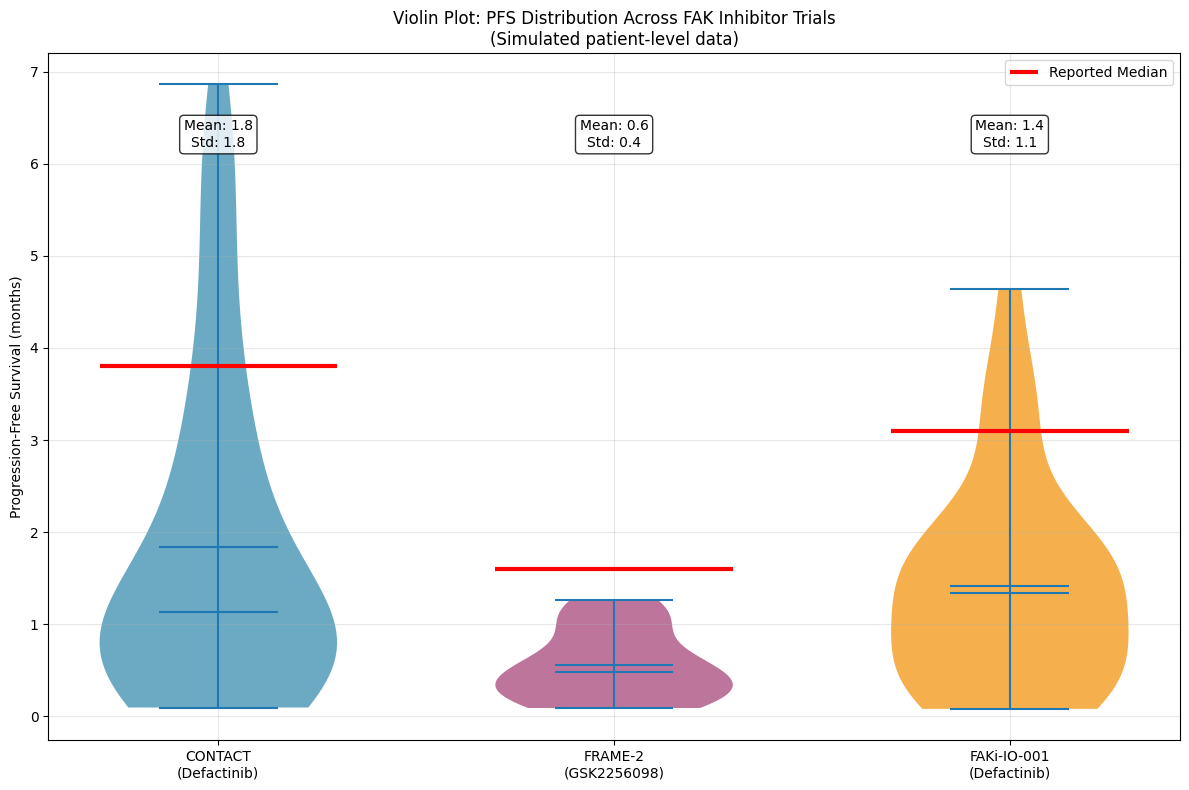

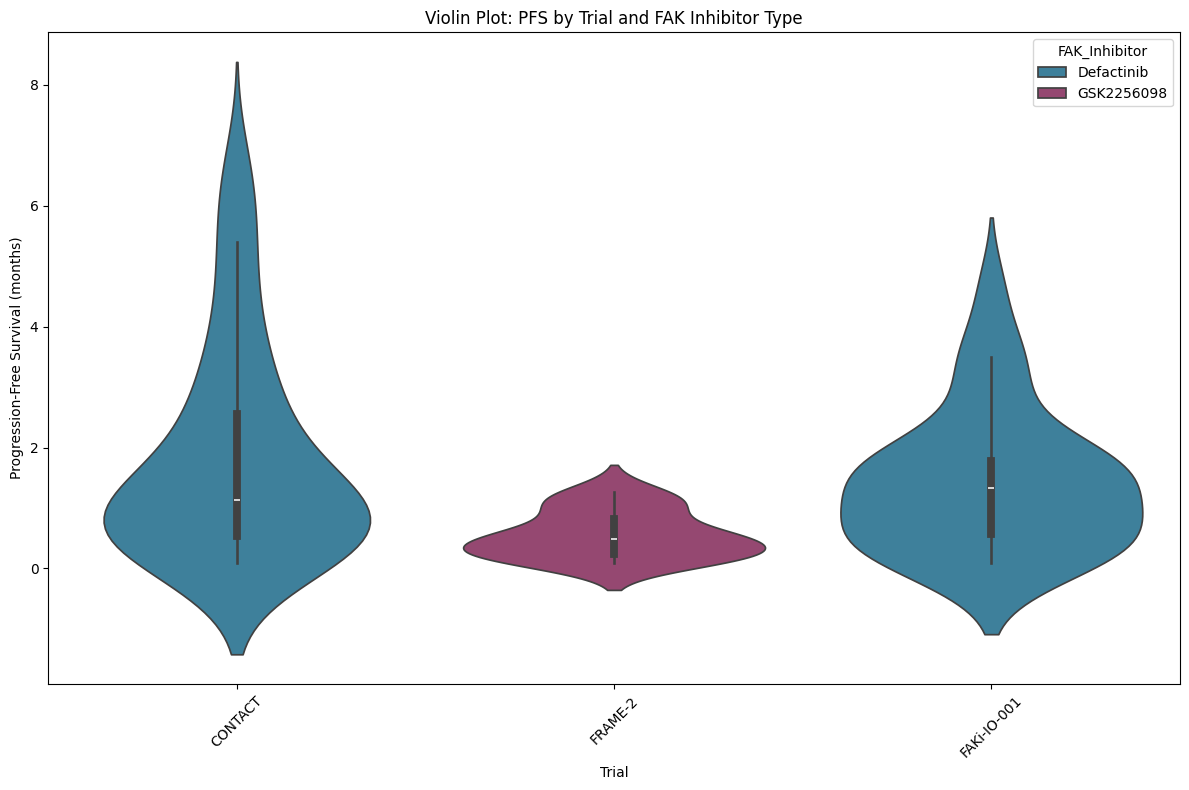

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Generate simulated patient-level data
np.random.seed(42)

# Simulate PFS data with different distributions for each trial
contact_pfs = np.random.exponential(3.8/2, 68) + np.random.normal(0, 0.5, 68)
frame2_pfs = np.random.exponential(1.6/2, 16) + np.random.normal(0, 0.3, 16)
fakio_pfs = np.random.exponential(3.1/2, 30) + np.random.normal(0, 0.4, 30)

# Ensure positive values
contact_pfs = np.abs(contact_pfs)
frame2_pfs = np.abs(frame2_pfs)
fakio_pfs = np.abs(fakio_pfs)

# Create violin plot data
violin_data = pd.DataFrame({
    'Trial': ['CONTACT']*68 + ['FRAME-2']*16 + ['FAKi-IO-001']*30,
    'PFS': np.concatenate([contact_pfs, frame2_pfs, fakio_pfs]),
    'FAK_Inhibitor': ['Defactinib']*68 + ['GSK2256098']*16 + ['Defactinib']*30
})

# Create violin plot
plt.figure(figsize=(12, 8))

# Main violin plot
violin_parts = plt.violinplot([contact_pfs, frame2_pfs, fakio_pfs],
                             positions=[1, 2, 3], widths=0.6, showmeans=True, showmedians=True)

# Customize violin colors
colors = ['#2E86AB', '#A23B72', '#F18F01']
for patch, color in zip(violin_parts['bodies'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Add actual median lines from trial data
actual_medians = [3.8, 1.6, 3.1]
for i, median in enumerate(actual_medians):
    plt.hlines(median, i+0.7, i+1.3, colors='red', linestyles='-', linewidth=3,
               label='Reported Median' if i == 0 else "")

# Customize plot
plt.xticks([1, 2, 3], ['CONTACT\n(Defactinib)', 'FRAME-2\n(GSK2256098)', 'FAKi-IO-001\n(Defactinib)'])
plt.ylabel('Progression-Free Survival (months)')
plt.title('Violin Plot: PFS Distribution Across FAK Inhibitor Trials\n(Simulated patient-level data)')
plt.legend()
plt.grid(True, alpha=0.3)

# Add summary statistics as text
for i, trial in enumerate(['CONTACT', 'FRAME-2', 'FAKi-IO-001']):
    data_subset = [contact_pfs, frame2_pfs, fakio_pfs][i]
    mean_val = np.mean(data_subset)
    std_val = np.std(data_subset)
    plt.text(i+1, plt.ylim()[1]*0.9, f'Mean: {mean_val:.1f}\nStd: {std_val:.1f}',
             ha='center', va='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Additional violin plot using seaborn for better aesthetics
plt.figure(figsize=(12, 8))
sns.violinplot(data=violin_data, x='Trial', y='PFS', hue='FAK_Inhibitor',
               palette=['#2E86AB', '#A23B72'], split=False)
plt.title('Violin Plot: PFS by Trial and FAK Inhibitor Type')
plt.ylabel('Progression-Free Survival (months)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

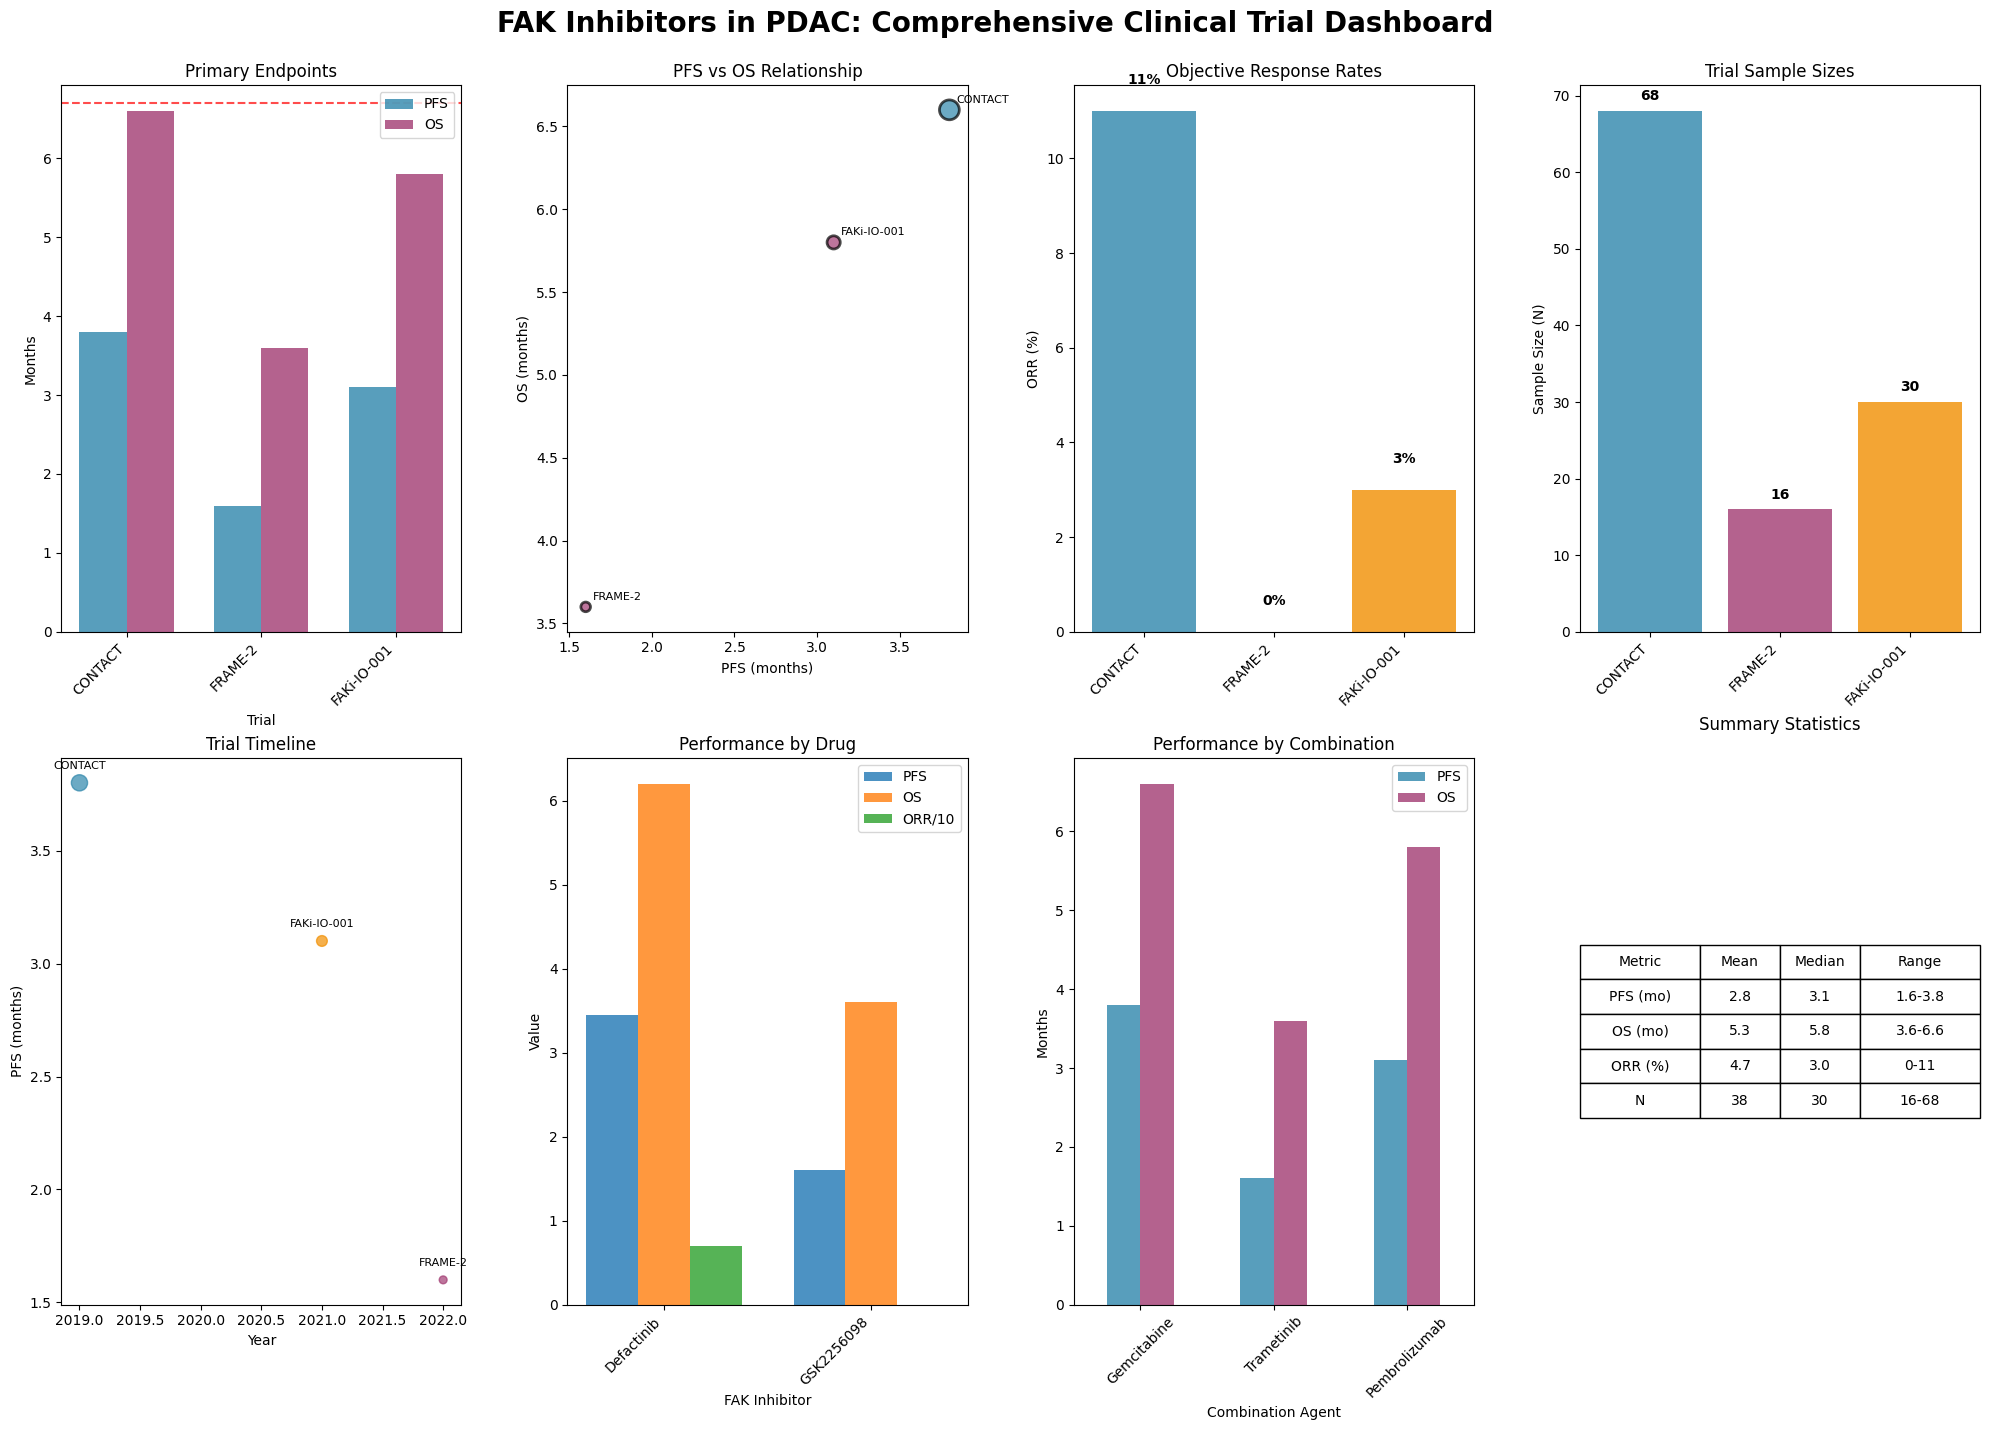

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Data
data = {
    'Trial': ['CONTACT', 'FRAME-2', 'FAKi-IO-001'],
    'Year': [2019, 2022, 2021],
    'Phase': ['II', 'II', 'Ib'],
    'FAK_Inhibitor': ['Defactinib', 'GSK2256098', 'Defactinib'],
    'Combination': ['Gemcitabine', 'Trametinib', 'Pembrolizumab'],
    'Line_of_Tx': ['1L', '≥2L', '≥2L'],
    'N': [68, 16, 30],
    'PFS': [3.8, 1.6, 3.1],
    'OS': [6.6, 3.6, 5.8],
    'ORR': [11, 0, 3]
}

df = pd.DataFrame(data)

# Create dashboard with multiple panels
fig = plt.figure(figsize=(20, 15))

# Panel 1: Bar chart - Primary endpoints
ax1 = plt.subplot(2, 4, 1)
x = np.arange(len(df))
width = 0.35
bars1 = ax1.bar(x - width/2, df['PFS'], width, label='PFS', color='#2E86AB', alpha=0.8)
bars2 = ax1.bar(x + width/2, df['OS'], width, label='OS', color='#A23B72', alpha=0.8)
ax1.set_xlabel('Trial')
ax1.set_ylabel('Months')
ax1.set_title('Primary Endpoints')
ax1.set_xticks(x)
ax1.set_xticklabels(df['Trial'], rotation=45, ha='right')
ax1.legend()
ax1.axhline(y=6.7, color='red', linestyle='--', alpha=0.7)

# Panel 2: Scatter plot - PFS vs OS
ax2 = plt.subplot(2, 4, 2)
colors = ['#2E86AB' if line == '1L' else '#A23B72' for line in df['Line_of_Tx']]
scatter = ax2.scatter(df['PFS'], df['OS'], s=df['N']*3, c=colors, alpha=0.7,
                     edgecolors='black', linewidth=2)
ax2.set_xlabel('PFS (months)')
ax2.set_ylabel('OS (months)')
ax2.set_title('PFS vs OS Relationship')
for i, trial in enumerate(df['Trial']):
    ax2.annotate(trial, (df['PFS'][i], df['OS'][i]), xytext=(5, 5),
                textcoords='offset points', fontsize=8)

# Panel 3: Response rates
ax3 = plt.subplot(2, 4, 3)
bars = ax3.bar(df['Trial'], df['ORR'], color=['#2E86AB', '#A23B72', '#F18F01'], alpha=0.8)
ax3.set_ylabel('ORR (%)')
ax3.set_title('Objective Response Rates')
ax3.set_xticklabels(df['Trial'], rotation=45, ha='right')
for i, v in enumerate(df['ORR']):
    ax3.text(i, v + 0.5, f'{v}%', ha='center', va='bottom', fontweight='bold')

# Panel 4: Sample sizes
ax4 = plt.subplot(2, 4, 4)
bars = ax4.bar(df['Trial'], df['N'], color=['#2E86AB', '#A23B72', '#F18F01'], alpha=0.8)
ax4.set_ylabel('Sample Size (N)')
ax4.set_title('Trial Sample Sizes')
ax4.set_xticklabels(df['Trial'], rotation=45, ha='right')
for i, v in enumerate(df['N']):
    ax4.text(i, v + 1, str(v), ha='center', va='bottom', fontweight='bold')

# Panel 5: Timeline
ax5 = plt.subplot(2, 4, 5)
ax5.scatter(df['Year'], df['PFS'], s=df['N']*2, c=['#2E86AB', '#A23B72', '#F18F01'], alpha=0.7)
ax5.set_xlabel('Year')
ax5.set_ylabel('PFS (months)')
ax5.set_title('Trial Timeline')
for i, trial in enumerate(df['Trial']):
    ax5.annotate(trial, (df['Year'][i], df['PFS'][i]), xytext=(0, 10),
                textcoords='offset points', ha='center', fontsize=8)

# Panel 6: Drug comparison
ax6 = plt.subplot(2, 4, 6)
drug_performance = df.groupby('FAK_Inhibitor').agg({
    'PFS': 'mean',
    'OS': 'mean',
    'ORR': 'mean'
}).reset_index()

x = np.arange(len(drug_performance))
width = 0.25
ax6.bar(x - width, drug_performance['PFS'], width, label='PFS', alpha=0.8)
ax6.bar(x, drug_performance['OS'], width, label='OS', alpha=0.8)
ax6.bar(x + width, drug_performance['ORR']/10, width, label='ORR/10', alpha=0.8)
ax6.set_xlabel('FAK Inhibitor')
ax6.set_ylabel('Value')
ax6.set_title('Performance by Drug')
ax6.set_xticks(x)
ax6.set_xticklabels(drug_performance['FAK_Inhibitor'], rotation=45, ha='right')
ax6.legend()

# Panel 7: Combination analysis
ax7 = plt.subplot(2, 4, 7)
combo_data = df[['Combination', 'PFS', 'OS']].set_index('Combination')
combo_data.plot(kind='bar', ax=ax7, color=['#2E86AB', '#A23B72'], alpha=0.8)
ax7.set_xlabel('Combination Agent')
ax7.set_ylabel('Months')
ax7.set_title('Performance by Combination')
ax7.legend()
ax7.tick_params(axis='x', rotation=45)

# Panel 8: Summary statistics table
ax8 = plt.subplot(2, 4, 8)
ax8.axis('tight')
ax8.axis('off')

# Create summary table
summary_data = [
    ['Metric', 'Mean', 'Median', 'Range'],
    ['PFS (mo)', f'{df["PFS"].mean():.1f}', f'{df["PFS"].median():.1f}',
     f'{df["PFS"].min():.1f}-{df["PFS"].max():.1f}'],
    ['OS (mo)', f'{df["OS"].mean():.1f}', f'{df["OS"].median():.1f}',
     f'{df["OS"].min():.1f}-{df["OS"].max():.1f}'],
    ['ORR (%)', f'{df["ORR"].mean():.1f}', f'{df["ORR"].median():.1f}',
     f'{df["ORR"].min():.0f}-{df["ORR"].max():.0f}'],
    ['N', f'{df["N"].mean():.0f}', f'{df["N"].median():.0f}',
     f'{df["N"].min():.0f}-{df["N"].max():.0f}']
]

table = ax8.table(cellText=summary_data, cellLoc='center', loc='center',
                 colWidths=[0.3, 0.2, 0.2, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)
ax8.set_title('Summary Statistics', pad=20)

# Overall title
fig.suptitle('FAK Inhibitors in PDAC: Comprehensive Clinical Trial Dashboard',
             fontsize=20, fontweight='bold', y=0.95)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()